In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
df=pd.read_csv('dress_rental_prices.csv',index_col=0)
df

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...,...
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75
29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42


In [10]:
#unique values in Catagoires
df['Catagories'].unique().tolist()

['dresses',
 nan,
 'dresses, midi',
 'bottoms',
 'Wool-Cashmere, Loose, Winter, 3/4 Sleeves, Scoop Neck, Monochrome, dresses, Casual',
 'dresses, Cotton-Jersey, Floral, Loose, Smart Casual, Seasonal, midi, Maxi, 3/4 Sleeves, Short Sleeve, A-Line',
 'dresses, mini, fitted, y2k, party',
 'dresses, mini, loose-fit, shift, smock',
 'dresses, mini',
 'dresses, cotton, Casual, Summer, Seasonal, mini, Short Sleeve, Baby Blue, Green',
 'dresses, regular-fit, Formal, Summer, Maxi, A-Line, Monochrome',
 'dresses, Tie-Front, regular-fit, Seasonal, Long Sleeve, Monochrome',
 'dresses, Floral, regular-fit, Smart, Summer, mini, Sleeveless, A-Line, Metallic',
 'dresses, Ruffled, Summer, midi, Sleeveless, Monochrome, White',
 'dresses, Formal, Summer, Seasonal, Maxi, 3/4 Sleeves, Cowl Neck, A-Line, Monochrome, Light Pink/Blush',
 'dresses, cotton, Floral, Ruffled, Wrap, Tie-Front, regular-fit, Casual, Smart Casual, Summer, mini, Short Sleeve, A-Line, Green',
 'dresses, cotton, Lace, Skinny-Fit, Summer

In [18]:
flat_categories = [cat for sublist in df['Catagories'] if sublist for cat in sublist.split(', ')]

# Get unique categories
unique_categories = sorted(set(flat_categories))

# Create a DataFrame with one-hot encoding
one_hot_df = pd.DataFrame(0, index=np.arange(len(df['Catagories'])), columns=unique_categories)

# Fill in the DataFrame
for i, cat_str in enumerate(df['Catagories']):
    if cat_str:
        cat_list = cat_str.split(', ')
        one_hot_df.loc[i, cat_list] = 1

print(one_hot_df)


       3/4 Sleeves  3/4 sleeve  A-Line  Animal Print  Baby Blue  Bandage  \
0                0           0       0             0          0        0   
1                0           0       0             0          0        0   
2                0           0       0             0          0        0   
3                0           0       0             0          0        0   
4                0           0       0             0          0        0   
...            ...         ...     ...           ...        ...      ...   
29992            0           0       0             0          0        0   
29993            0           0       1             0          0        0   
29994            0           0       0             0          0        0   
29995            0           0       0             0          0        0   
29996            0           0       0             0          0        0   

       Beige  Bell Sleeve  Black  Bodycon  ...  v-neck  victorian  waist  \
0          

In [16]:
df['Catagories'] = df['Catagories'].replace(np.nan, 'Unknown')

In [12]:
df.duplicated().sum()

0

In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.isna().sum()

ID            0
Name          2
Brand         0
Colour        0
Catagories    0
Price         0
dtype: int64

In [20]:
#concatenate the one_hot_df with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)
df

,ID,Name,Brand,Colour,Catagories,Price,3/4 Sleeves,3/4 sleeve,A-Line,Animal Print,...,v-neck,victorian,waist,wash,wedding,wedding guest,y2k,yellow,zebra,zimmerman
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73605,Ellen,RIXO,beige,dresses,47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.columns.to_list()

['ID',
 'Name',
 'Brand',
 'Colour',
 'Catagories',
 'Price',
 '3/4 Sleeves',
 '3/4 sleeve',
 'A-Line',
 'Animal Print',
 'Baby Blue',
 'Bandage',
 'Beige',
 'Bell Sleeve',
 'Black',
 'Bodycon',
 'Burgundy',
 'Button Down',
 'Camo',
 'Casual',
 'Chambray',
 'Checked',
 'Cotton-Jersey',
 'Cowl Neck',
 'Crew Neck',
 'Crop',
 'Denim',
 'Distressed',
 'Drawstring',
 'Embellished-Formal',
 'Faux Fur',
 'Floral',
 'Formal',
 'Gold (Metal)',
 'Green',
 'Grey',
 'Horizontal Stripe',
 'Hot Pink',
 'Khaki/Olive',
 'Lace',
 'Large Print',
 'Leather-Faux Leather',
 'Light Pink/Blush',
 'Long Sleeve',
 'Loose',
 'Low Waisted',
 'Maxi',
 'Mesh',
 'Metallic',
 'Micro',
 'Monochrome',
 'Monogram',
 'Navy',
 'Off The Shoulder',
 'Palazzo',
 'Pencil',
 'Polka Dot',
 'Polo Collar',
 'Ripped',
 'Rose Gold',
 'Ruffled',
 'Scoop Neck',
 'Seasonal',
 'Short Sleeve',
 'Skinny-Fit',
 'Sky Blue',
 'Sleeveless',
 'Smart',
 'Smart Casual',
 'Spaghetti Straps',
 'Strapless',
 'Strappy',
 'Summer',
 'Sweetheart',
 

In [25]:
#drop the 'Catagories' column
df = df.drop(columns='Catagories')



KeyError: "['Catagories'] not found in axis"

In [26]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Colour']=le.fit_transform(df['Colour'])

In [27]:
df

,ID,Name,Brand,Colour,Price,3/4 Sleeves,3/4 sleeve,A-Line,Animal Print,Baby Blue,...,v-neck,victorian,waist,wash,wedding,wedding guest,y2k,yellow,zebra,zimmerman
0,74416,Runway stripe dress,797,0,111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73815,Reformation Kourtney Dress,695,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73801,Ivory Viola bridal dress,294,0,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73718,Pasu Dress - Rhino Tusk,180,0,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73605,Ellen,676,0,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,872,Silk and wool-blend crepe dress yellow,881,19,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29993,871,La Guardia Matching Set,254,19,43,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29994,844,One-shoulder ruffled crepe mini dress,783,19,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,592,Billie Dress,694,19,42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#drop name and id columns
df = df.drop(columns=['Name', 'ID'])


In [30]:
#split the data into features and target
X = df.drop(columns='Price')
y = df['Price']


In [33]:
X

,Brand,Colour,3/4 Sleeves,3/4 sleeve,A-Line,Animal Print,Baby Blue,Bandage,Beige,Bell Sleeve,...,v-neck,victorian,waist,wash,wedding,wedding guest,y2k,yellow,zebra,zimmerman
0,797,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,695,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,294,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,676,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,881,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29993,254,19,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29994,783,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,694,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
#ann model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512,input_shape=(299,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


C:\Users\kalli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1922.6249 - val_loss: 1540.2578
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1446.7029 - val_loss: 1684.3470
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1459.1874 - val_loss: 1569.4937
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1389.9606 - val_loss: 1529.2913
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1361.5753 - val_loss: 1492.4475
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1477.6693 - val_loss: 1511.9725
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1400.3674 - val_loss: 1522.6478
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1384.3794 - val_loss: 1487.2593
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1364.0721 - val_loss: 1484.5208
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1390.5630 - val_loss: 1458.5919
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1400.5505 - val_lo

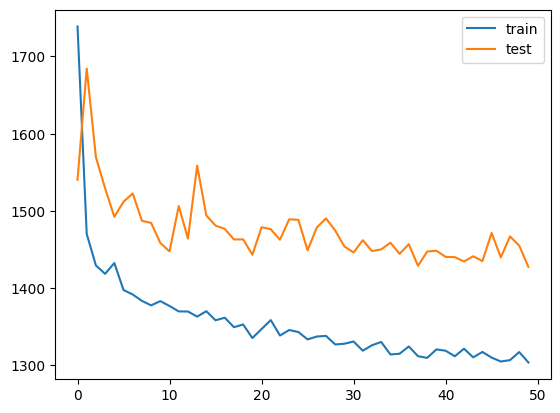

In [38]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [36]:
#dtr model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

#predict the test set
y_pred = dtr.predict(X_test)

#evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1091.3933303794568
